Week 6 - Project
------------------------

#### Exploring the European Soccer Database: Can Goalkeepers take free kicks?

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the database:

In [2]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df = df.dropna()

In [15]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

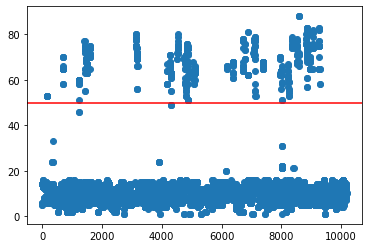

In [68]:
plt.scatter(df['id'][:10000],df['gk_diving'][:10000])
plt.axhline(y = 50, color = 'r', linestyle = '-')

Creating mask to filter only the goalkeepers based on the attributes:
- GK diving
- GK handling
- GK kicking
- GK positioning
- GK reflexes

Goalkeepers with bad attributes are also filtered out.

In [59]:
div_mask = df['gk_diving'] > 50
han_mask = df['gk_handling'] > 50
kic_mask = df['gk_kicking'] > 50
pos_mask = df['gk_positioning'] > 50
ref_mask = df['gk_reflexes'] > 50


data = df[div_mask & han_mask & kic_mask & pos_mask & ref_mask].copy()

In [60]:
data.shape

(13374, 42)

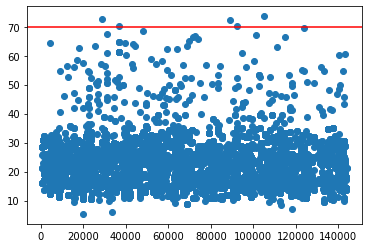

Relevant attributes for free kicks:  
- Free kick accuracy  
- Shot power

Creating a new attribute (free kick proficiency) to account for both power and accuracy in a weighted fashion:

In [61]:
data['fk_proficiency'] = (3*data['free_kick_accuracy'] + 2*data['shot_power'])/5

Creating a mask to find the proficient goalkeepers:

In [63]:
gk_takers = data['fk_proficiency'] > 70

data[gk_takers]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,fk_proficiency
28853,28854,1219,34530,2007-02-22 00:00:00,85.0,88.0,right,medium,medium,9.0,...,77.0,9.0,8.0,9.0,85.0,84.0,78.0,84.0,86.0,72.6
36900,36901,192593,115184,2013-02-15 00:00:00,71.0,76.0,right,medium,medium,11.0,...,20.0,15.0,14.0,13.0,72.0,69.0,75.0,67.0,73.0,70.4
88913,88914,3974,30582,2007-02-22 00:00:00,76.0,82.0,right,medium,medium,18.0,...,92.0,24.0,22.0,29.0,74.0,71.0,83.0,76.0,85.0,72.4
92073,92074,48717,30989,2007-02-22 00:00:00,79.0,80.0,right,medium,medium,18.0,...,71.0,23.0,20.0,16.0,79.0,78.0,78.0,79.0,80.0,70.2
105130,105131,49472,34003,2007-02-22 00:00:00,76.0,82.0,left,medium,medium,12.0,...,74.0,11.0,11.0,11.0,77.0,74.0,82.0,74.0,79.0,73.6
160911,160912,111106,2984,2007-02-22 00:00:00,65.0,74.0,right,medium,medium,29.0,...,77.0,22.0,28.0,25.0,64.0,63.0,57.0,63.0,63.0,70.2
163237,163238,153297,26335,2007-02-22 00:00:00,70.0,74.0,right,medium,medium,28.0,...,82.0,2.0,45.0,11.0,66.0,74.0,67.0,66.0,71.0,76.4


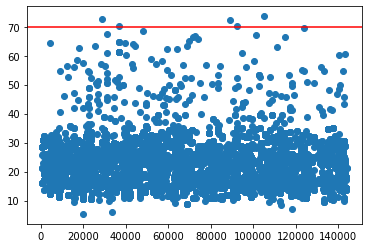

In [70]:
plt.scatter(data['id'][:10000], data['fk_proficiency'][:10000])
plt.axhline(y = 70, color = 'r', linestyle = '-')

We found 7 goalkeepers who also could potentially take free kicks in matches. Through their FIFA player ID, these players can be identified.

According to fifaindex.com, these are the players we found:

| FIFA player ID | Player Name | Team | Overall | Game edition|
|:--------------:|:-----------:|:----:|:-------:|:-----------:|
|1219| Christian Abbiati | Torino FC (ITA) | 85 | FIFA 07 |
|192593| Danijel Subašić | AS Monaco FC (FRA) | 71 | FIFA 13 |
|3974| José Moreira | SL Benfica (POR) | 76 | FIFA 07 |
|48717| Júlio César | Inter Milan (ITA) | 79 | FIFA 07|
|49472| Ludovic Butelle | Valencia CF (SPA) | 75 | FIFA 07 |
|111106| Sergio Aragoneses | Hércules CF (SPA) | 64 | FIFA 07 |
|153297| Simon Pouplin | Stade Rennais FC (FRA) | 70 | FIFA 07 |